**Table of contents**<a id='toc0_'></a>    
1. [EDA](#toc1_)    
1.1. [Import libraries and other useful code](#toc1_1_)  
1.2. [Read preprocessed dataset](#toc1_2_)    

2.1. [Crop dataset](#toc2_1_)    
2.2. [Precipitations dataset](#toc2_2_)    
2.2.1. [Preprocessing](#toc2_2_1_)    
2.3. [Pesticides dataset](#toc2_3_)    
2.4. [Fertilizers dataset](#toc2_4_)    
2.4.1. [Preprocessing](#toc2_4_1_)    
2.5. [Temperature dataset](#toc2_5_)    
3. [Create final dataframe](#toc3_)    
3.1. [Preprocessing](#toc3_1_) 

---
## 1. <a id='toc1_'></a>[EDA](#toc1_)

### 1.1. <a id='toc1_1_'></a>[Import libraries and other useful code](#toc1_1_)

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
# define color palette
agro = ['#b2cb91','#9bc27e','#7fa465','#668f4f','#4e6f43','#59533e','#bf9000','#ffd966','#ffe599']

In [23]:
sns.set(style="whitegrid")  # Seaborn Grid Style

### 1.2. <a id='toc1_2_'></a>[Read preprocessed dataset](#toc1_2_)

In [4]:
df = pd.read_csv('Data/df_preprocessed.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517523 entries, 0 to 517522
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Area                  517523 non-null  object 
 1   Item Code             517523 non-null  int64  
 2   Crop                  517523 non-null  object 
 3   Year                  517523 non-null  int64  
 4   area_harvested_ha     517523 non-null  float64
 5   production_tonnes     517523 non-null  float64
 6   yield_hg/ha           517523 non-null  float64
 7   avg_rainfall_mm_year  517523 non-null  float64
 8   avg_temp_ºC           517523 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 35.5+ MB


In [18]:
# convert item code and year variables to object type, because although they are numerical they are discrete variables.
df['Item Code'] = df['Item Code'].astype(object)
df['Year'] = df['Year'].astype(object)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517523 entries, 0 to 517522
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Area                  517523 non-null  object 
 1   Item Code             517523 non-null  object 
 2   Crop                  517523 non-null  object 
 3   Year                  517523 non-null  object 
 4   area_harvested_ha     517523 non-null  float64
 5   production_tonnes     517523 non-null  float64
 6   yield_hg/ha           517523 non-null  float64
 7   avg_rainfall_mm_year  517523 non-null  float64
 8   avg_temp_ºC           517523 non-null  float64
dtypes: float64(5), object(4)
memory usage: 35.5+ MB


In [21]:
# Set the display of numbers in decimal notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
area_harvested_ha,517523.00,249753.35,1585052.84,0.00,2483.00,220624.00,249753.35,103566966.00
production_tonnes,517523.00,902662.80,10808823.86,0.00,864.00,11000.00,100121.00,768594154.00
yield_hg/ha,517523.00,94999.91,147096.57,0.00,27586.00,94999.91,94999.91,8755278.00
avg_rainfall_mm_year,517523.00,1157.85,771.74,56.00,600.00,1020.00,1668.00,3205.11
avg_temp_ºC,517523.00,19.19,7.65,-3.96,12.37,21.85,25.56,29.65


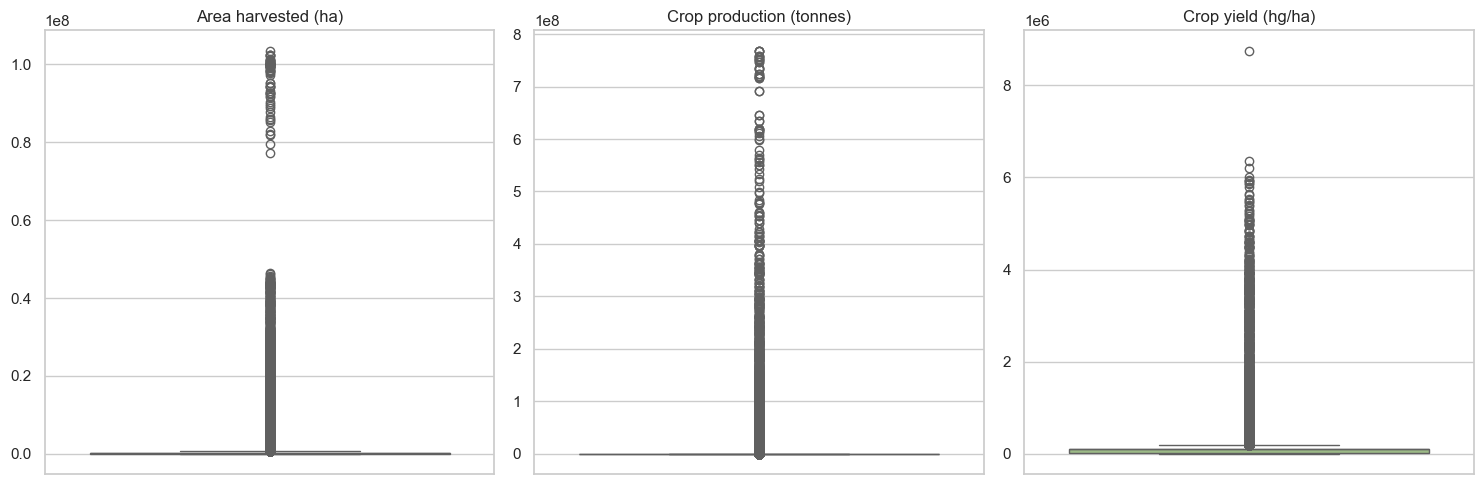

In [31]:
# Create boxplot
var1 = df['area_harvested_ha']
var2 = df['production_tonnes']
var3 = df['yield_hg/ha']

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))

fig = sns.boxplot(y=var1, data=df, ax=axes[0], color = agro[1]) 
axes[0].set_title('Area harvested (ha)')
axes[0].set_ylabel('')  

fig = sns.boxplot(y=var2, data=df, ax=axes[1], color = agro[1]) 
axes[1].set_title('Crop production (tonnes)')
axes[1].set_ylabel('') 

fig = sns.boxplot(y=var3, data=df, ax=axes[2], color = agro[1])  
axes[2].set_title('Crop yield (hg/ha)')
axes[2].set_ylabel('')  

# Adjust the design
plt.tight_layout()

# Show
plt.show()

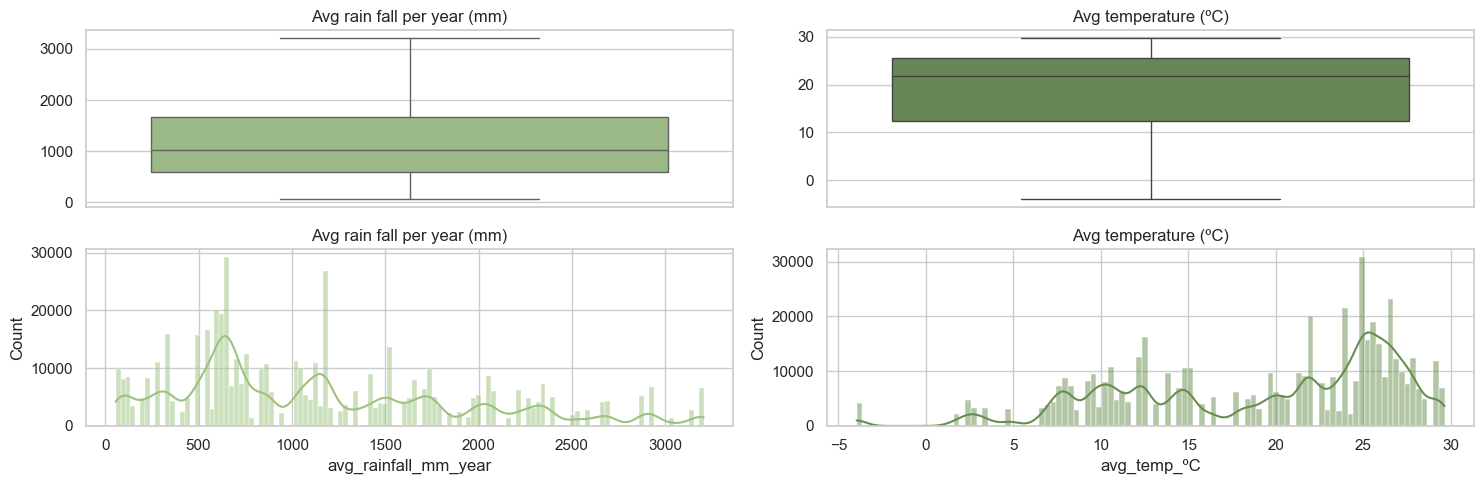

In [37]:
# Create boxplot + histplot
var4 = df['avg_rainfall_mm_year']
var5 = df['avg_temp_ºC']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15, 5))

fig = sns.boxplot(y=var4, data=df, ax=axes[0, 0], color = agro[1]) 
axes[0, 0].set_title('Avg rain fall per year (mm)')
axes[0, 0].set_ylabel('')  

fig = sns.boxplot(y=var5, data=df, ax=axes[0, 1], color = agro[3]) 
axes[0, 1].set_title('Avg temperature (ºC)')
axes[0, 1].set_ylabel('') 

sns.histplot(var4, kde=True, ax=axes[1, 0], color=agro[1])
axes[1, 0].set_title('Avg rain fall per year (mm)')

sns.histplot(var5, kde=True, ax=axes[1, 1], color=agro[3])
axes[1, 1].set_title('Avg temperature (ºC)')

# Adjust the design
plt.tight_layout()

# Show
plt.show()